## Modelagem (Spanish)

- Existen varias técnicas para analizar y detectar el fraude.
- Aquí utilicé un enfoque de aprendizaje **no supervisado**, creando puntuaciones de fraude para cada transacción inmobiliaria.
- Se crearán 2 partituras con diferentes técnicas de Machine Learning y luego combinaremos las partituras y presentaremos la puntuación final.
- La Ingeniería de Atributos será parte fundamental del proceso.
- Los comentarios de cada código están en portugués.

In [0]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python :', python_version())

Versão da Linguagem Python : 3.9.5


## Instalación y carga de paquetes

In [0]:
# Para actualizar un paquete, ejecute el siguiente comando en la terminal o en el símbolo del sistema:
# pip install -U nombre_paquete

# Para instalar la versión exacta de un paquete, ejecute el siguiente comando en la terminal o en el símbolo del sistema:
# !pip install nombre_paquete==versión_deseado

# Después de instalar o actualizar el paquete, reinicie su computadora portátil jupyter.

# Instale el paquete de marca de agua.
# Este paquete se utiliza para registrar las versiones de otros paquetes utilizados en este cuaderno de jupyter.
!pip install -q -U watermark

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-ebc74f37-b0ba-4aa3-887c-0fed481d45ea/bin/python -m pip install --upgrade pip' command.


In [0]:
# Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Eric Passos" --iversions

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<command-1134564385694110> in <cell line: 2>()
      1 # Versões dos pacotes usados neste jupyter notebook
----> 2 get_ipython().run_line_magic('reload_ext', 'watermark')
      3 get_ipython().run_line_magic('watermark', '-a "Eric Passos" --iversions')

/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py in run_line_magic(self, magic_name, line, _stack_depth)
   2405                 kwargs['local_ns'] = self.get_local_scope(stack_depth)
   2406             with self.builtin_trap:
-> 2407                 result = fn(*args, **kwargs)
   2408             return result
   2409 

/databricks/python/lib/python3.9/site-packages/decorator.py in fun(*args, **kw)
    230             if not kwsyntax:
    231                 args, kw = fix(args, kw, sig)
--> 232             return caller(func, *(extras + args), **kw)
   

## Cargando datos

In [0]:
# Carrega os dados
df = pd.read_csv('/dbfs/FileStore/shared_uploads/eric.passos@dataside.com.br/dataset-23.csv')

In [0]:
# Shape
df.shape

Out[5]: (1070994, 32)

In [0]:
# Visualiza amostra dos dados
df.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [0]:
# Colunas
df.columns

Out[7]: Index(['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE'],
      dtype='object')

In [0]:
# Resumo
print("Linhas: ", df.shape[0])
print("Colunas: ", df.shape[1])
print("\nVariáveis: \n", df.columns.tolist())
print("\nValores Ausentes: \n" , df.isnull().sum())
print("\nValores Únicos: \n", df.nunique())

Linhas:  1070994
Colunas:  32

Variáveis: 
 ['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

Valores Ausentes: 
 RECORD            0
BBLE              0
B                 0
BLOCK             0
LOT               0
EASEMENT    1066358
OWNER         31745
BLDGCL            0
TAXCLASS          0
LTFRONT           0
LTDEPTH           0
EXT          716689
STORIES       56264
FULLVAL           0
AVLAND            0
AVTOT             0
EXLAND            0
EXTOT             0
EXCD1        432506
STADDR          676
ZIP           29890
EXMPTCL     1055415
BLDFRONT          0
BLDDEPTH          0
AVLAND2      788268
AVTOT2       788262
EXLAND2      983545
EXTOT2       940166
EXCD2        978046
PERIOD            0
YEAR              0
VA

In [0]:
# Vamos trabalhar com uma cópia do dataframe
df_temp = df.copy()

## Limpieza y transformación de datos

### Borrar valores faltantes de la variable ZIP

In [0]:
# Contagem de valores ausentes
df_temp['ZIP'].isna().sum()

Out[10]: 29890

In [0]:
# Vamos calcular o valor da variável zip que aparece com maior frequência (calcular a moda)
# Se não houver nenhum valor de moda, substitua por 1
def calcula_moda(x):
    m = pd.Series.mode(x)
    if m.empty:
        x = np.array(range(1,11))
        return x[0]
    else:
        return m.values[0]

In [0]:
# Definindo a função de contagem para calcular a frequência do valor da moda de cada grupo (que vamos definir)
def contagem(x):
    return x.value_counts().head(1)

In [0]:
# Agrupando valores pela variável 'B' e 'BLOCK' e usando as duas funções acima para criar dataframe auxiliar
# Teremos o valor da moda da variável ZIP para cada grupo com registros com as variáveis B e Block
df_zip_group = df_temp.groupby(['B','BLOCK'])['ZIP'].agg(ZIP = calcula_moda, Count = contagem).reset_index()

In [0]:
# Verificando os 25 primeiros registros
df_zip_group.head(25)

,B,BLOCK,ZIP,Count
0,1,1,10004.0,2
1,1,2,10004.0,2
2,1,3,10004.0,4
3,1,4,10004.0,53
4,1,5,10004.0,9
5,1,6,10004.0,2
6,1,7,10004.0,15
7,1,8,10004.0,6
8,1,9,10004.0,4
9,1,10,10004.0,8


In [0]:
# Para os grupos sem valor de moda, comparamos a frequência do grupo, um grupo abaixo e um grupo acima
# Inserimos o valor do ZIP do grupo com maior frequência
for i in range(len(df_zip_group)):
    if (df_zip_group.loc[i,'ZIP'] == 1):
        if df_zip_group.loc[i - 1,'Count'] > df_zip_group.loc[i + 1,'Count']:
            val = df_zip_group.loc[i - 1,'ZIP']
        else:
            val = df_zip_group.loc[i + 1,'ZIP']
        df_zip_group.loc[i,'ZIP'] = val

In [0]:
# Verificando os 25 primeiros registros
df_zip_group.head(25)

,B,BLOCK,ZIP,Count
0,1,1,10004.0,2
1,1,2,10004.0,2
2,1,3,10004.0,4
3,1,4,10004.0,53
4,1,5,10004.0,9
5,1,6,10004.0,2
6,1,7,10004.0,15
7,1,8,10004.0,6
8,1,9,10004.0,4
9,1,10,10004.0,8


In [0]:
# Definindo a função que preenche os registros com valor ZIP ausente por meio do dataframe auxiliar
def preenche_moda(x):
    if pd.isnull(x['ZIP']):
        return df_zip_group[(df_zip_group['B'] == x['B']) & (df_zip_group['BLOCK'] == x['BLOCK'])]['ZIP'].values[0]
    else:
        return x['ZIP']

In [0]:
# Usando a função para preencher os valores ZIP ausentes
df_temp['ZIP'] = df_temp.apply(preenche_moda, axis = 1)

In [0]:
# Verificando se há algum valor ZIP restante com valor NA
df_temp['ZIP'].isna().sum()

Out[19]: 0

In [0]:
# Verificando manualmente uma das ocorrências para checar se a fórmula funcionou corretamente
df_temp[(df_temp['B']==1) & (df_temp['BLOCK']==36)]['ZIP']

Out[20]: 6092    10005.0
6093    10005.0
6094    10005.0
6095    10005.0
Name: ZIP, dtype: float64

In [0]:
# Visualiza
df_temp.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [0]:
# Vamos salvar o dataframe resultante em disco
df_temp.to_csv('/dbfs/FileStore/shared_uploads/eric.passos@dataside.com.br/dataset_zip_limpo.csv')

In [0]:
df_temp['ZIP'] = df_temp['ZIP'].astype(int).astype(str)

In [0]:
# Cria cópia da estrutura do dataframe
df_temp2 = df_temp.copy()

In [0]:
# Carrega os dados do disco
df_temp2 = pd.read_csv('/dbfs/FileStore/shared_uploads/eric.passos@dataside.com.br/dataset_zip_limpo.csv')

### Borrar valores faltantes de variables:
FULLVAL, AVLAND, AVTOT, BLDFRONT, BLDDEPTH, LTFRONT e LTDEPTH

In [0]:
# Substituindo valores vazios por valores NaN para garantir que a função fillna funcione nas etapas posteriores
df_temp2.replace(0, np.nan, inplace = True)

In [0]:
# Definindo a lista de variáveis a serem preenchidas
list_fill = ['FULLVAL', 'AVLAND', 'AVTOT', 'BLDFRONT', 'BLDDEPTH', 'LTFRONT', 'LTDEPTH']

In [0]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 13007
AVLAND --> Número de valores ausentes: 13009
AVTOT --> Número de valores ausentes: 13007
BLDFRONT --> Número de valores ausentes: 228815
BLDDEPTH --> Número de valores ausentes: 228853
LTFRONT --> Número de valores ausentes: 169108
LTDEPTH --> Número de valores ausentes: 170128


In [0]:
# Preenchendo os registros vazios com a mediana do grupo ZIP e BLDGCL se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['ZIP','BLDGCL'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [0]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 10294
AVLAND --> Número de valores ausentes: 10294
AVTOT --> Número de valores ausentes: 10294
BLDFRONT --> Número de valores ausentes: 75202
BLDDEPTH --> Número de valores ausentes: 75218
LTFRONT --> Número de valores ausentes: 16025
LTDEPTH --> Número de valores ausentes: 17764


In [0]:
# Preenchendo os registros vazios com a mediana do grupo ZIP e TAXCLASS se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['ZIP','TAXCLASS'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [0]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 3915
AVLAND --> Número de valores ausentes: 3915
AVTOT --> Número de valores ausentes: 3915
BLDFRONT --> Número de valores ausentes: 31226
BLDDEPTH --> Número de valores ausentes: 31130
LTFRONT --> Número de valores ausentes: 3092
LTDEPTH --> Número de valores ausentes: 3146


In [0]:
# Preenchendo os registros ausentes com a mediana do grupo B e TAXCLASS se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['B','TAXCLASS'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [0]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 678
AVLAND --> Número de valores ausentes: 678
AVTOT --> Número de valores ausentes: 678
BLDFRONT --> Número de valores ausentes: 22317
BLDDEPTH --> Número de valores ausentes: 18831
LTFRONT --> Número de valores ausentes: 2
LTDEPTH --> Número de valores ausentes: 2


In [0]:
# Preenchendo os registros ausentes com a mediana do grupo B se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['B'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [0]:
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 0
AVLAND --> Número de valores ausentes: 0
AVTOT --> Número de valores ausentes: 0
BLDFRONT --> Número de valores ausentes: 0
BLDDEPTH --> Número de valores ausentes: 0
LTFRONT --> Número de valores ausentes: 0
LTDEPTH --> Número de valores ausentes: 0


### Borrar valores faltantes de la variable STORIES

In [0]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 56264


In [0]:
# Imputação da mediana com base nos grupos de ZIP e BLDGCL
df_temp2['STORIES'] = df_temp2.groupby(['ZIP','BLDGCL'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [0]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 42102


In [0]:
# Imputação da mediana com base nos grupos de BLDGCL e STORIES
df_temp2['STORIES'] = df_temp2.groupby(['BLDGCL'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [0]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 4280


In [0]:
# Imputação da mediana com base nos grupos de TAXCLASS e STORIES
df_temp2['STORIES'] = df_temp2.groupby(['TAXCLASS'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [0]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 0


In [0]:
# Salvando resultado em disco
df_temp2.to_csv('/dbfs/FileStore/shared_uploads/eric.passos@dataside.com.br/dataset_variaveis_limpo.csv')

## Ingeniería de atributos

Creemos algunas variables a partir de operaciones con variables existentes.

In [0]:
# Cópia do dataframe
df_proc = df_temp2.copy()

In [0]:
# LTFRONT * LTDEPTH
df_proc['AREA1'] = df_proc['LTFRONT'] * df_proc['LTDEPTH']

In [0]:
# Visualiza amostra
df_proc[['AREA1', 'LTFRONT', 'LTDEPTH']].head()

,AREA1,LTFRONT,LTDEPTH
0,523000.0,500.0,1046.0
1,9585.0,27.0,355.0
2,399876.0,709.0,564.0
3,436943.0,793.0,551.0
4,406980.0,323.0,1260.0


In [0]:
# BLDFRONT * BLDDEPTH
df_proc['AREA2'] = df_proc['BLDFRONT'] * df_proc['BLDDEPTH']

In [0]:
# Visualiza amostra
df_proc[['AREA2', 'BLDFRONT', 'BLDDEPTH']].head()

,AREA2,BLDFRONT,BLDDEPTH
0,121476.0,382.0,318.0
1,121476.0,382.0,318.0
2,399876.0,709.0,564.0
3,46835.0,85.0,551.0
4,5073.0,89.0,57.0


In [0]:
# AREA2 * STORIES
df_proc['AREA3'] = df_proc['AREA2'] * df_proc['STORIES']

In [0]:
# Visualiza amostra
df_proc[['AREA2', 'STORIES', 'AREA3']].head()

,AREA2,STORIES,AREA3
0,121476.0,4.0,485904.0
1,121476.0,1.0,121476.0
2,399876.0,3.0,1199628.0
3,46835.0,2.0,93670.0
4,5073.0,1.0,5073.0


In [0]:
# Dividindo FULLVAL, AVLAND e AVTOT pelas variáveis recém criadas AREA1, AREA2 e AREA3 para gerar um índice
k = 1
for i in ['FULLVAL', 'AVLAND', 'AVTOT']:
    for j in ['AREA1', 'AREA2', 'AREA3']:
        indice_area = 'ind' + str(k)
        df_proc[indice_area] = df_proc[i] / df_proc[j]
        print(indice_area + ' é a combinação feita entre:', i, j)
        k += 1

ind1 é a combinação feita entre: FULLVAL AREA1
ind2 é a combinação feita entre: FULLVAL AREA2
ind3 é a combinação feita entre: FULLVAL AREA3
ind4 é a combinação feita entre: AVLAND AREA1
ind5 é a combinação feita entre: AVLAND AREA2
ind6 é a combinação feita entre: AVLAND AREA3
ind7 é a combinação feita entre: AVTOT AREA1
ind8 é a combinação feita entre: AVTOT AREA2
ind9 é a combinação feita entre: AVTOT AREA3


In [0]:
# Visualiza amostra
df_proc.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,523000.0,121476.0,485904.0,40.917782,176.166486,44.041621,8.079350,34.784649,8.696162,18.413002,79.274919,19.818730
1,1.0,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,9585.0,121476.0,121476.0,20219.092332,1595.376865,1595.376865,1492.957746,117.801047,117.801047,9098.591549,717.919589,717.919589
2,2.0,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,399876.0,399876.0,1199628.0,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424
3,3.0,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,436943.0,46835.0,93670.0,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700
4,4.0,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,406980.0,5073.0,5073.0,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541


In [0]:
df_proc['ZIP'].dtype

Out[55]: dtype('float64')

In [0]:
# Converte o tipo da variável zip para string
df_proc['ZIP'] = df_proc['ZIP'].astype(int).astype(str)

In [0]:
df_proc['ZIP'].dtype

Out[57]: dtype('O')

In [0]:
# Visualiza
df_proc.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,523000.0,121476.0,485904.0,40.917782,176.166486,44.041621,8.079350,34.784649,8.696162,18.413002,79.274919,19.818730
1,1.0,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,9585.0,121476.0,121476.0,20219.092332,1595.376865,1595.376865,1492.957746,117.801047,117.801047,9098.591549,717.919589,717.919589
2,2.0,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,399876.0,399876.0,1199628.0,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424
3,3.0,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,436943.0,46835.0,93670.0,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700
4,4.0,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,406980.0,5073.0,5073.0,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541


In [0]:
# Lista das variáveis para o agrupamento abaixo
list_groupby = ['ZIP', 'TAXCLASS', 'B']

In [0]:
# Cria variáveis que representam as médias das áreas dos imóveis por grupo com base no índice criado

# Lista
ind_lista = ['ind' + str(i) for i in range(1,10)]

# Loop
for i in list_groupby:
    for j in ind_lista:
        name_col = 'media_' + str(j) + '_grupo_' + str(i)
        df_proc[name_col] = df_proc.groupby(i)[j].transform('mean')
        name_col_final = str(j) + '_' + name_col
        df_proc[name_col_final] = df_proc[j] / df_proc[name_col]

In [0]:
# Visualiza
df_proc.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,media_ind1_grupo_ZIP,ind1_media_ind1_grupo_ZIP,media_ind2_grupo_ZIP,ind2_media_ind2_grupo_ZIP,media_ind3_grupo_ZIP,ind3_media_ind3_grupo_ZIP,media_ind4_grupo_ZIP,ind4_media_ind4_grupo_ZIP,media_ind5_grupo_ZIP,ind5_media_ind5_grupo_ZIP,media_ind6_grupo_ZIP,ind6_media_ind6_grupo_ZIP,media_ind7_grupo_ZIP,ind7_media_ind7_grupo_ZIP,media_ind8_grupo_ZIP,ind8_media_ind8_grupo_ZIP,media_ind9_grupo_ZIP,ind9_media_ind9_grupo_ZIP,media_ind1_grupo_TAXCLASS,ind1_media_ind1_grupo_TAXCLASS,media_ind2_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,media_ind3_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,media_ind4_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,media_ind5_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,media_ind6_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,media_ind7_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,media_ind8_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,media_ind9_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,media_ind1_grupo_B,ind1_media_ind1_grupo_B,media_ind2_grupo_B,ind2_media_ind2_grupo_B,media_ind3_grupo_B,ind3_media_ind3_grupo_B,media_ind4_grupo_B,ind4_media_ind4_grupo_B,media_ind5_grupo_B,ind5_media_ind5_grupo_B,media_ind6_grupo_B,ind6_media_ind6_grupo_B,media_ind7_grupo_B,ind7_media_ind7_grupo_B,media_ind8_grupo_B,ind8_media_ind8_grupo_B,media_ind9_grupo_B,ind9_media_ind9_grupo_B
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,523000.0,121476.0,485904.0,40.917782,176.166486,44.041621,8.079350,34.784649,8.696162,18.413002,79.274919,19.818730,308.567411,0.132606,399.54316,0.440920,136.599794,0.322414,43.91237,0.183988,90.426622,0.384673,52.264394,0.166388,126.01684,0.146115,166.965375,0.474799,58.52076,0.338662,219.170893,0.186694,861.398717,0.204512,449.71508,0.097932,39.657134,0.203730,274.576789,0.126685,163.840149,0.053077,98.698597,0.186558,408.041766,0.194281,209.16395,0.094752,363.950199,0.112427,554.922709,0.317461,162.784056,0.270552,35.93064,0.224860,67.911275,0.512207,31.906732,0.272549,95.545234,0.192715,146.188725,0.542278,45.061308,0.439817
1,1.0,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,9585.0,121476.0,121476.0,20219.092332,1595.376865,1595.376865,1492.957746,117.801047,117.801047,9098.591549,717.919589,717.919589,308.567411,65.525689,399.54316,3.993003,136.599794,11.679204,43.91237,33.998569,90.426622,1.302725,52.264394,2.253945,126.01684,72.201394,166.965375,4.299811,58.52076,12.267776,219.170893,92.252635,861.398717,1.852077,449.71508,3.547528,39.657134,37.646638,274.576789,0.429028,163.840149,0.719000,98.698597,92.185622,408.041766,1.759427,209.16395,3.432329,363.950199,55.554558,554.922709,2.874953,162.784056,9.800572,35.93064,41.551103,67.911275,1.734632,31.906732,3.692044,95.545234,95.228104,146.188725,4.910909,45.061308,15.932063
2,2.0,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,399876.0,399876.0,1199628.0,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424,308.567411,0.848425,399.54316,0.655239,136.599794,0.638840,43.91237,2.221515,90.426622,1.078797,52.264394,0.622170,126.01684,0.934861,166.965375,0.705585,58.52076,0.671034,219.170893,1.194484,861.398717,0.303920,449.71508,0.194046,39.657

In [0]:
# Shape
df_proc.shape

Out[62]: (1070994, 99)

In [0]:
# Média para todas as variáveis
for j in ind_lista:
    name_col = 'media_' + str(j) + '_grupo_All'
    df_proc[name_col] = df_proc[j].mean()
    name_col_final = str(j) + '_' + name_col
    df_proc[name_col_final] = df_proc[j] / df_proc[name_col]

In [0]:
# Shape
df_proc.shape

Out[64]: (1070994, 117)

In [0]:
# Visualiza
df_proc.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,media_ind1_grupo_ZIP,ind1_media_ind1_grupo_ZIP,media_ind2_grupo_ZIP,ind2_media_ind2_grupo_ZIP,media_ind3_grupo_ZIP,ind3_media_ind3_grupo_ZIP,media_ind4_grupo_ZIP,ind4_media_ind4_grupo_ZIP,media_ind5_grupo_ZIP,ind5_media_ind5_grupo_ZIP,media_ind6_grupo_ZIP,ind6_media_ind6_grupo_ZIP,media_ind7_grupo_ZIP,ind7_media_ind7_grupo_ZIP,media_ind8_grupo_ZIP,ind8_media_ind8_grupo_ZIP,media_ind9_grupo_ZIP,ind9_media_ind9_grupo_ZIP,media_ind1_grupo_TAXCLASS,ind1_media_ind1_grupo_TAXCLASS,media_ind2_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,media_ind3_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,media_ind4_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,media_ind5_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,media_ind6_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,media_ind7_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,media_ind8_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,media_ind9_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,media_ind1_grupo_B,ind1_media_ind1_grupo_B,media_ind2_grupo_B,ind2_media_ind2_grupo_B,media_ind3_grupo_B,ind3_media_ind3_grupo_B,media_ind4_grupo_B,ind4_media_ind4_grupo_B,media_ind5_grupo_B,ind5_media_ind5_grupo_B,media_ind6_grupo_B,ind6_media_ind6_grupo_B,media_ind7_grupo_B,ind7_media_ind7_grupo_B,media_ind8_grupo_B,ind8_media_ind8_grupo_B,media_ind9_grupo_B,ind9_media_ind9_grupo_B,media_ind1_grupo_All,ind1_media_ind1_grupo_All,media_ind2_grupo_All,ind2_media_ind2_grupo_All,media_ind3_grupo_All,ind3_media_ind3_grupo_All,media_ind4_grupo_All,ind4_media_ind4_grupo_All,media_ind5_grupo_All,ind5_media_ind5_grupo_All,media_ind6_grupo_All,ind6_media_ind6_grupo_All,media_ind7_grupo_All,ind7_media_ind7_grupo_All,media_ind8_grupo_All,ind8_media_ind8_grupo_All,media_ind9_grupo_All,ind9_media_ind9_grupo_All
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,523000.0,121476.0,485904.0,40.917782,176.166486,44.041621,8.079350,34.784649,8.696162,18.413002,79.274919,19.818730,308.567411,0.132606,399.54316,0.440920,136.599794,0.322414,43.91237,0.183988,90.426622,0.384673,52.264394,0.166388,126.01684,0.146115,166.965375,0.474799,58.52076,0.338662,219.170893,0.186694,861.398717,0.204512,449.71508,0.097932,39.657134,0.203730,274.576789,0.126685,163.840149,0.053077,98.698597,0.186558,408.041766,0.194281,209.16395,0.094752,363.950199,0.112427,554.922709,0.317461,162.784056,0.270552,35.93064,0.224860,67.911275,0.512207,31.906732,0.272549,95.545234,0.192715,146.188725,0.542278,45.061308,0.439817,343.735061,0.119039,607.276406,0.290093,283.67069,0.155256,11.094569,0.728226,44.11249,0.788544,23.912472,0.363666,30.658337,0.600587,75.635641,1.048116,34.430619,0.575614
1,1.0,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,9585.0,121476.0,121476.0,20219.092332,1595.376865,1595.376865,1492.957746,117.801047,117.801047,9098.591549,717.919589,717.919589,308.567411,65.525689,399.54316,3.993003,136.599794,11.679204,43.91237,33.998569,90.426622,1.302725,52.264394,2.253945,126.01684,72.201394,166.965375,4.299811,58.52076,12.267776,219.170893,92.252635,861.398717,1.852077,449.71508,3.547528,39.657134,37.646638,274.576789,0.429028,163.840149,0.719000,98.698597,92.185622,408.041766,1.759427,209.16395,3.432329,363.950199,55.554558,554.922709,2.874953,162.784056,9.800572,35.93064,41.551103,67.911275,1.734632,31.906732,3.692044,95.545234,95.228104,146.188725,4.910909,45.061308,15.932063,343.73

In [0]:
# Lista para as colunas criadas
cols_created = []

In [0]:
# Loop pelas variáveis do group by
for i in list_groupby:
    for j in ind_lista:
        cols_created.append(j + '_media_' + j + '_grupo_' + i)

In [0]:
len(cols_created)

Out[68]: 27

In [0]:
# Loop pelas colunas criadas
for j in ind_lista:
    cols_created.append(j + '_media_' + j + '_grupo_All')

In [0]:
len(cols_created)

Out[70]: 36

In [0]:
# Colunas finais para os dados
cols = list(df.columns) + cols_created

In [0]:
# Dataframe final
df_final = df_proc[cols]

In [0]:
# Shape
df_final.shape

Out[73]: (1070994, 68)

Las variables ind nos ayudan a comprobar qué tan "normal" es cada registro.

In [0]:
# Colunas
df_final.columns

Out[74]: Index(['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'ind1_media_ind1_grupo_ZIP',
       'ind2_media_ind2_grupo_ZIP', 'ind3_media_ind3_grupo_ZIP',
       'ind4_media_ind4_grupo_ZIP', 'ind5_media_ind5_grupo_ZIP',
       'ind6_media_ind6_grupo_ZIP', 'ind7_media_ind7_grupo_ZIP',
       'ind8_media_ind8_grupo_ZIP', 'ind9_media_ind9_grupo_ZIP',
       'ind1_media_ind1_grupo_TAXCLASS', 'ind2_media_ind2_grupo_TAXCLASS',
       'ind3_media_ind3_grupo_TAXCLASS', 'ind4_media_ind4_grupo_TAXCLASS',
       'ind5_media_ind5_grupo_TAXCLASS', 'ind6_media_ind6_grupo_TAXCLASS',
       'ind7_media_ind7_grupo_TAXCLASS', 'ind8_media_ind8_grupo_TAXCLASS',
       'ind9_media_ind9_grupo_TAXCLASS', 'ind1_media_in

In [0]:
# Visualiza
df_final.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,2.168326,134.344249,392.945875,6.773371,263.878267,456.555954,2.389233,144.666800,412.748342,3.052753,62.312985,119.356295,7.500158,86.903268,145.639640,3.050536,59.195770,115.480448,1.838369,96.727571,329.739454,8.278026,351.364636,747.855349,3.151215,165.227152,536.032968,1.946484,88.388624,189.220556,26.809043,540.9

In [0]:
# Salva em disco
#df_final.to_csv('dados/dataset_final.csv')

In [0]:
# Carrega do disco
#df_final = pd.read_csv('dados/dataset_final.csv')

In [0]:
# Dataframe final para a modelagem
df = df_final.copy()

## Calcular la puntuación de fraude 1 con PCA

Crearemos la puntuación de fraude utilizando PCA de escala Z. Este es un enfoque de aprendizaje no supervisado.

In [0]:
# Imports
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [0]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Eric Passos" --iversions

Author: Eric Passos

pandas    : 1.3.4
seaborn   : 0.11.2
sklearn   : 0.24.2
numpy     : 1.20.3
matplotlib: 3.4.3



### Estandarización de variables

In [0]:
# Shape
df.shape

Out[81]: (1070994, 68)

In [0]:
# Colunas
df.columns

Out[82]: Index(['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'ind1_media_ind1_grupo_ZIP',
       'ind2_media_ind2_grupo_ZIP', 'ind3_media_ind3_grupo_ZIP',
       'ind4_media_ind4_grupo_ZIP', 'ind5_media_ind5_grupo_ZIP',
       'ind6_media_ind6_grupo_ZIP', 'ind7_media_ind7_grupo_ZIP',
       'ind8_media_ind8_grupo_ZIP', 'ind9_media_ind9_grupo_ZIP',
       'ind1_media_ind1_grupo_TAXCLASS', 'ind2_media_ind2_grupo_TAXCLASS',
       'ind3_media_ind3_grupo_TAXCLASS', 'ind4_media_ind4_grupo_TAXCLASS',
       'ind5_media_ind5_grupo_TAXCLASS', 'ind6_media_ind6_grupo_TAXCLASS',
       'ind7_media_ind7_grupo_TAXCLASS', 'ind8_media_ind8_grupo_TAXCLASS',
       'ind9_media_ind9_grupo_TAXCLASS', 'ind1_media_in

In [0]:
# Tipos de dados
df.dtypes

Out[83]: RECORD                              int64
BBLE                               object
B                                   int64
BLOCK                               int64
LOT                                 int64
EASEMENT                           object
OWNER                              object
BLDGCL                             object
TAXCLASS                           object
LTFRONT                           float64
LTDEPTH                           float64
EXT                                object
STORIES                           float64
FULLVAL                           float64
AVLAND                            float64
AVTOT                             float64
EXLAND                            float64
EXTOT                             float64
EXCD1                             float64
STADDR                             object
ZIP                                object
EXMPTCL                            object
BLDFRONT                          float64
BLDDEPTH                 

In [0]:
# Busca as 36 últimas colunas (com as variáveis que nós criamos na Engenharia de Atributos)
df.iloc[:,-36:].columns

Out[84]: Index(['ind1_media_ind1_grupo_ZIP', 'ind2_media_ind2_grupo_ZIP',
       'ind3_media_ind3_grupo_ZIP', 'ind4_media_ind4_grupo_ZIP',
       'ind5_media_ind5_grupo_ZIP', 'ind6_media_ind6_grupo_ZIP',
       'ind7_media_ind7_grupo_ZIP', 'ind8_media_ind8_grupo_ZIP',
       'ind9_media_ind9_grupo_ZIP', 'ind1_media_ind1_grupo_TAXCLASS',
       'ind2_media_ind2_grupo_TAXCLASS', 'ind3_media_ind3_grupo_TAXCLASS',
       'ind4_media_ind4_grupo_TAXCLASS', 'ind5_media_ind5_grupo_TAXCLASS',
       'ind6_media_ind6_grupo_TAXCLASS', 'ind7_media_ind7_grupo_TAXCLASS',
       'ind8_media_ind8_grupo_TAXCLASS', 'ind9_media_ind9_grupo_TAXCLASS',
       'ind1_media_ind1_grupo_B', 'ind2_media_ind2_grupo_B',
       'ind3_media_ind3_grupo_B', 'ind4_media_ind4_grupo_B',
       'ind5_media_ind5_grupo_B', 'ind6_media_ind6_grupo_B',
       'ind7_media_ind7_grupo_B', 'ind8_media_ind8_grupo_B',
       'ind9_media_ind9_grupo_B', 'ind1_media_ind1_grupo_All',
       'ind2_media_ind2_grupo_All', 'ind3_media_ind3_g

In [0]:
# Cria o objeto scaler
scaler = preprocessing.StandardScaler()

In [0]:
# Aplica o scaler às variáveis
arr_scaled = scaler.fit_transform(df.iloc[:,-36:])

In [0]:
# Cria o dataframe
df_scaled = pd.DataFrame(arr_scaled, columns = cols_created)

In [0]:
# Visualiza a amostra
df_scaled.head()

,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All
0,-0.217642,-0.058083,-0.061874,-0.063673,-0.024200,-0.031534,-0.087295,-0.024959,-0.029884,-0.141901,-0.032287,-0.010859,-0.098582,-0.014261,-0.006837,-0.118500,-0.031582,-0.010875,-0.060567,-0.046552,-0.041157,-0.033691,-0.006001,-0.009110,-0.054825,-0.007588,-0.009502,-0.040192,-0.045643,-0.049198,-0.012697,-0.002692,-0.007698,-0.030665,0.000833,-0.006849
1,16.190473,0.310943,0.975171,2.574879,0.011906,0.047434,7.279154,0.156815,0.509155,15.921190,0.034584,0.030668,4.537038,-0.009324,-0.002029,13.283676,0.029767,0.029220,3.722748,0.127880,0.496549,1.762530,0.009037,0.033714,6.399266,0.064835,0.253274,2.637975,0.104614,0.269305,6.240320,0.021270,0.047501,22.708403,0.147039,0.320354
2,-0.038033,-0.035817,-0.032979,0.095315,0.003099,-0.014292,-0.006659,-0.013991,-0.014865,0.033932,-0.028252,-0.009702,0.180741,-0.010528,-0.005787,0.028206,-0.027880,-0.009758,-0.019153,-0.036028,-0.026175,0.074542,0.005369,0.000240,0.015824,-0.003218,-0.002180,-0.010875,-0.036577,-0.040324,0.364084,0.015425,0.004353,0.218246,0.009655,0.002268
3,-0.177963,0.113743,0.188440,-0.015991,0.102335,0.080045,-0.069481,0.059679,0.100225,-0.103056,-0.001151,-0.000836,-0.014811,0.003042,-0.000043,-0.086090,-0.003016,-0.001197,-0.051418,0.034667,0.088630,-0.001231,0.046701,0.051399,-0.039217,0.026134,0.053925,-0.033715,0.024320,0.027680,0.100303,0.081283,0.070297,0.024324,0.068910,0.072129
4,0.293151,13.853133,35.790522,0.450496,10.338813,17.232588,0.142026,6.827386,18.605602,0.358152,2.488535,1.424803,0.804752,1.402810,1.044369,0.298717,2.281088,1.375258,0.057209,6.529051,18.548245,0.316335,4.310177,9.353199,0.146094,2.722560,9.075113,0.043181,5.618616,10.961996,1.205816,6.874744,12.060259,0.677213,5.512374,11.305086


### Aplicación de PCA

In [0]:
# Cria e treina o modelo PCA
# Queremos encontrar o valor ideal de componentes principais
pca = PCA().fit(df_scaled)

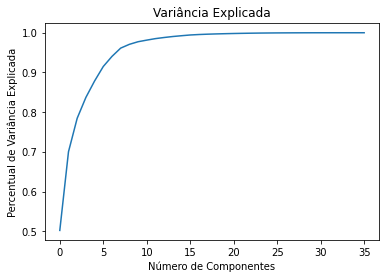

In [0]:
# Visualiza a Soma Cumulativa da Variância Explicada
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Percentual de Variância Explicada') 
plt.title('Variância Explicada')
plt.show()

In [0]:
# Pelo gráfico acima 10 componentes principais são suficentes. Usaremos esse valor.
pca = PCA(n_components = 10)

In [0]:
# Fit e transform do modelo pca
arr_pca = pca.fit_transform(df_scaled)

In [0]:
# Cria a lista colunas doo PCA
cols_PCA = ['PCA' + str(i) for i in range(1,11)]
cols_PCA

Out[93]: ['PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10']

In [0]:
# Armazena os componentes em um dataframe
df_scaled_pca = pd.DataFrame(arr_pca, columns = cols_PCA)

In [0]:
# Visualiza amostra
df_scaled_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.189786,-0.225928,-0.070251,-0.061773,0.068859,-0.138118,0.036129,-0.006097,0.054610,-0.030597
1,9.243828,28.165459,9.693018,2.014850,-3.490405,6.142835,0.500528,0.333164,9.767022,1.717823
2,0.037149,0.276740,0.007367,0.076539,0.023640,-0.144762,-0.026214,0.050815,0.322028,-0.075612
3,0.224525,-0.182780,-0.168560,-0.105874,-0.069198,-0.069884,-0.085056,-0.009260,0.131555,-0.037318
4,43.391792,-9.788772,-11.472998,-9.508949,-21.790186,4.601164,-14.752986,-10.398443,1.856951,4.854452


### Aplicación de la escala Z en componentes PCA estandarizados

In [0]:
# Fit e transform nos dados
arr_pca_scaled_z = scaler.fit_transform(df_scaled_pca)

In [0]:
# Cria o dataframe
df_pca_scaled_z = pd.DataFrame(arr_pca_scaled_z, columns = cols_PCA)

In [0]:
# Visualiza
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093356,-0.062923
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523599,0.384416,16.696576,3.532780
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155500
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224892,-0.076746
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174430,9.983398


### Calcular la puntuación de fraude

In [0]:
# Loop para calcular o score por componente PCA
for i in range(1,11):
    col_name = 'score' + str(i)
    pca_col_name = 'PCA' + str(i)
    df_pca_scaled_z[col_name] = df_pca_scaled_z[pca_col_name] ** 2 

In [0]:
# Visualiza
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093356,-0.062923,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003959
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523599,0.384416,16.696576,3.532780,4.721539,111.367812,30.968961,2.151928,8.188489,28.722446,0.274156,0.147776,278.775637,12.480534
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155500,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024180
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224892,-0.076746,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005890
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174430,9.983398,104.038733,13.451864,43.387278,47.930008,319.134643,16.114584,238.177405,143.953722,10.077008,99.668236


In [0]:
# Colunas
col_scores = ['score' + str(i) for i in range(1,11)]

In [0]:
# Calcula o score de fraude
df_pca_scaled_z['Fraud Score 1'] = df_pca_scaled_z[col_scores].sum(axis = 1) ** (1 / 2)

In [0]:
# Visualiza
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,Fraud Score 1
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093356,-0.062923,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003959,0.211342
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523599,0.384416,16.696576,3.532780,4.721539,111.367812,30.968961,2.151928,8.188489,28.722446,0.274156,0.147776,278.775637,12.480534,21.858620
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155500,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024180,0.601415
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224892,-0.076746,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005890,0.306945
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174430,9.983398,104.038733,13.451864,43.387278,47.930008,319.134643,16.114584,238.177405,143.953722,10.077008,99.668236,32.185921


In [0]:
# Dataframe final com o score
df_score1 = pd.merge(df, df_pca_scaled_z.iloc[:,-1], left_index = True, right_index = True)

In [0]:
# Shape
df_score1.shape

Out[105]: (1070994, 69)

In [0]:
# Visualiza
df_score1.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211342
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858620
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306945
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,2.168326,134.344249,392.945875,6.773371,263.878267,456.555954,2.389233,144.666800,412.748342,3.052753,62.312985,119.356295,7.500158,86.903268,145.639640,3.050536,59.195770,115.480448,1.838369,96.727571,329.739454,8.278026,351.364636,747.855349,3.151215,165.227152,536.0

## Calcular la puntuación de fraude 2 con Deep Learning

Usaremos un modelo de Autoencoder. Este es un enfoque de aprendizaje no supervisado.

In [0]:
# Imports
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

In [0]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Eric Passos" --iversions

Author: Eric Passos

keras     : 2.9.0
tensorflow: 2.9.1
pandas    : 1.3.4
seaborn   : 0.11.2
sklearn   : 0.24.2
numpy     : 1.20.3
matplotlib: 3.4.3



In [0]:
# Carrega os dados com os 10 componentes principais
df_pca = df_pca_scaled_z.iloc[:,:10]

In [0]:
# Divisão em treino e teste
X_treino, X_teste = train_test_split(df_pca, test_size = 0.2, random_state = 42)

In [0]:
# Extrai os valores
X_treino = X_treino.values
X_teste = X_teste.values

In [0]:
# Shape
X_treino.shape

Out[112]: (856795, 10)

### Construcción de modelos

In [0]:
# Hiperparâmetros do modelo
input_dim = X_treino.shape[1]
encoding_dim = 5
input_layer = Input(shape = (input_dim, ))

input_layer --> encoder --> decoder

In [0]:
# Modelo

# Encoder
encoder = Dense(encoding_dim, activation = "tanh", activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation = "relu")(encoder)

# Decoder
decoder = Dense(int(encoding_dim / 2), activation = 'tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

# Modelo final
autoencoder = Model(inputs = input_layer, outputs = decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Hiperparâmetros de treinamento
num_epoch = 50
batch_size = 256

In [0]:
# Compila o modelo
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [0]:
# Checkpoint
checkpointer = ModelCheckpoint(filepath = "modelo/modelo_autoencoder.h5", verbose = 0, save_best_only = True)

In [0]:
tensorboard = TensorBoard(log_dir = '.\logs', 
                          histogram_freq = 0, 
                          write_graph = True, 
                          write_images = True,
                          profile_batch = 100000000)

In [0]:
# Treinamento
history = autoencoder.fit(X_treino, 
                          X_treino,
                          epochs = num_epoch,
                          batch_size = batch_size,
                          shuffle = True,
                          validation_data = (X_teste, X_teste),
                          verbose = 1,
                          callbacks = [checkpointer, tensorboard]).history

Epoch 1/50
3347/3347 [==============================] - 7s 2ms/step - loss: 1.0079 - accuracy: 0.1177 - val_loss: 0.9208 - val_accuracy: 0.1228
Epoch 2/50
1346/3347 [===========>..................] - ETA: 3s - loss: 0.8335 - accuracy: 0.1129

*** WARNING: max output size exceeded, skipping output. ***

3347/3347 [==============================] - 6s 2ms/step - loss: 0.9407 - accuracy: 0.3264 - val_loss: 0.8851 - val_accuracy: 0.3423
Epoch 50/50
3347/3347 [==============================] - 6s 2ms/step - loss: 0.9394 - accuracy: 0.3129 - val_loss: 0.8876 - val_accuracy: 0.3402


### Evaluación del modelo

In [0]:
# Carrega o modelo do disco
autoencoder = load_model('modelo/modelo_autoencoder.h5')

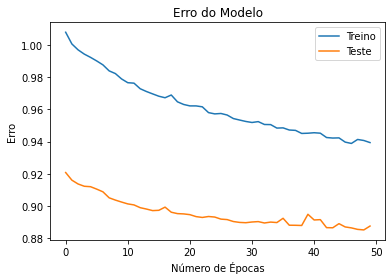

In [0]:
# Plot
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Erro do Modelo')
plt.ylabel('Erro')
plt.xlabel('Número de Épocas')
plt.legend(['Treino', 'Teste'], loc = 'upper right');

In [0]:
# Previsões
previsoes = autoencoder.predict(df_pca)
previsoes

10289/33469 

*** WARNING: max output size exceeded, skipping output. ***

33469/33469 [==============================] - 37s 1ms/step
Out[122]: array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  8.721746  ,  4.766576  , ...,  0.        ,
        11.271364  ,  0.        ],
       [ 0.        ,  0.01210284,  0.        , ...,  0.        ,
         0.3211546 ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [0]:
# Previsões em dataframe
df_previsoes = pd.DataFrame(previsoes, columns = cols_PCA)

In [0]:
# Visualiza
df_previsoes.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,8.721746,4.766576,5.189086,0.0,8.093206,1.689345,0.000000,11.271364,0.000000
2,0.000000,0.012103,0.000000,0.000000,0.0,0.151593,0.000000,0.000000,0.321155,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.047883,0.000000,0.000000,0.000000,0.000000
4,3.157018,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.025152,0.000000,2.461152


In [0]:
# Shape
df_previsoes.shape

Out[125]: (1070994, 10)

In [0]:
# Colunas do PCA
cols_pca = ['PCA' + str(i) for i in range(1,11)]

In [0]:
# Dataframe
df_autoencod = pd.DataFrame(0, index = np.arange(len(df_previsoes)), columns = cols_pca)

In [0]:
# Loop
for i in range(0,10):
    df_autoencod.iloc[:,i] = (df_previsoes.iloc[:,i] - df_pca_scaled_z.iloc[:,i]) ** 2

In [0]:
# Calcula o score 2
df_autoencod['Fraud Score 2'] = df_autoencod[cols_pca].sum(axis = 1) ** (1 / 2)

In [0]:
# Visualiza
df_autoencod.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,Fraud Score 2
0,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003959,0.211342
1,4.721539,3.353837,0.637443,13.854332,8.188489,7.474066,1.358963,0.147776,29.432919,12.480534,9.036033
2,0.000076,0.008388,0.000018,0.003105,0.000376,0.077223,0.000752,0.003438,0.052600,0.024180,0.412501
3,0.002786,0.004690,0.009365,0.005942,0.003218,0.011849,0.007917,0.000114,0.050576,0.005890,0.319917
4,49.602725,13.451864,43.387278,47.930008,319.134643,16.114584,238.177405,144.557911,10.077008,56.584180,30.643394


In [0]:
# Dataframe
df_score2 = pd.merge(df_score1.iloc[:,1:], df_autoencod.iloc[:,-1], left_index = True, right_index = True)

In [0]:
# Visualiza
df_score2.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2
0,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211342,0.211342
1,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858620,9.036033
2,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415,0.412501
3,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306945,0.319917
4,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,2.168326,134.344249,392.945875,6.773371,263.878267,456.555954,2.389233,144.666800,412.748342,3.052753,62.312985,119.356295,7.500158,86.903268,145.639640,3.050536,59.195770,115.480448,1.838369,96.727571,329.739454,8.278026,351.364636,747

## Calcular la puntuación final de fraude y presentar los resultados

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html

https://www.mathsisfun.com/algebra/matrix-rank.html

In [0]:
# Cópia do dataframe
df_fraudes = df_score2.copy()

In [0]:
# Calcula o Rank do Score 1
df_fraudes['Rank_Fraud Score 1'] = df_fraudes['Fraud Score 1'].rank(ascending = True, method = 'first')
df_fraudes.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1
0,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211342,0.211342,741726.0
1,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858620,9.036033,1070274.0
2,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415,0.412501,1023940.0
3,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306945,0.319917,964204.0
4,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,2.168326,134.344249,392.945875,6.773371,263.878267,456.555954,2.389233,144.666800,412.748342,3.052753,62.312985,119.356295,7.500158,86.903268,145.639640,3.050536,59.195770,115.480

In [0]:
# Calcula o Rank do Score 2
df_fraudes['Rank_Fraud Score 2'] = df_fraudes['Fraud Score 2'].rank(ascending = True, method = 'first')
df_fraudes.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2
0,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211342,0.211342,741726.0,764856.0
1,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858620,9.036033,1070274.0,1069900.0
2,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415,0.412501,1023940.0,1014178.0
3,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306945,0.319917,964204.0,987691.0
4,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,2.168326,134.344249,392.945875,6.773371,263.878267,456.555954,2.389233,144.666800,412.748342,3.052753,62.312985,119.356295

In [0]:
# Organiza os dados
df_fraudes.sort_values('Rank_Fraud Score 1', ascending = False).head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2
632815,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157.0,95.0,NaN,1.0,2.930000e+06,1.318500e+06,1.318500e+06,NaN,NaN,NaN,86-55 BROADWAY,11373,NaN,1.0,1.0,1.201200e+06,1.201200e+06,NaN,NaN,NaN,FINAL,2010/11,AC-TR,0.932679,3552.965339,5459.740071,11.839361,8664.281284,9225.968208,4.730309,7525.630784,8651.551054,2.374901,20917.627942,85252.370375,9.574238,60709.723730,142805.971089,2.376405,20929.365242,85293.645699,0.346562,4297.315684,8529.211578,10.918825,24947.889183,45105.510052,3.143866,16116.564291,31912.758060,0.571506,4824.821074,10328.878197,7.967947,29889.494191,55138.591300,2.883423,17432.257841,38294.402650,1024.704958,1013.081782,1070994.0,1070994.0
565391,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117.0,108.0,NaN,2.0,4.326304e+09,1.946837e+09,1.946837e+09,1.946837e+09,1.946837e+09,2231.0,FLATBUSH AVENUE,11234,X1,20.0,52.0,8.484847e+08,8.484847e+08,8.484847e+08,8.484847e+08,NaN,FINAL,2010/11,AC-TR,1617.350022,3990.133637,3575.629646,9968.357994,9827.199634,8897.042516,7667.182238,8900.940261,8062.175553,1562.156387,4829.247274,4625.047715,3885.067564,6817.613159,5712.758255,1561.021628,4587.663541,4474.858915,1402.666071,6633.316452,7094.088091,20453.624446,55324.430177,48347.475246,8402.770820,33377.941861,33151.872391,996.055534,6850.105430,7332.282745,13887.033346,42436.016445,39141.882967,5025.407821,24749.685481,27184.499848,914.747711,908.166842,1070993.0,1070993.0
917941,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910.0,100.0,NaN,3.0,3.740199e+08,1.792809e+09,4.668309e+09,1.792809e+09,4.668309e+09,2198.0,154-68 BROOKVILLE BOULEVARD,11422,X4,37.5,56.0,1.644454e+09,4.501180e+09,1.644454e+09,4.501180e+09,NaN,FINAL,2010/11,AC-TR,7.247847,309.159692,194.077820,842.952680,5868.161765,5252.177825,1217.103627,6220.542000,5790.150710,3.475604,206.762214,132.012997,92.072767,3109.215999,1736.893245,96.331233,5447.982161,3542.682286,1.343846,261.219163,172.820560,450.994794,16153.565176,9735.156230,338.131241,27172.689482,17935.077014,2.216100,293.284416,209.285758,329.110772,19353.216175,11900.603717,310.119810,29390.962040,21521.582668,870.172385,859.556933,1070992.0,1070992.0
132748,1018750046E,1,1875,46,E,CNY/NYCTA,U7,3,2.0,1.0,NaN,2.0,7.100000e+05,3.195000e+05,3.195000e+05,NaN,NaN,NaN,BROADWAY,10025,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1275.342300,0.146458,0.140875,3366.871157,0.301826,0.184341,1957.483765,0.214069,0.170689,1329.817718,0.196412,0.174029,1951.487956,0.496404,0.455290,1528.874381,0.228469,0.202912,975.408177,0.127946,0.218080,4446.066056,0.470467,0.500678,1671.982921,0.218553,0.354517,1032.772155,0.116915,0.125145,14398.937468,0.724285,0.668061,5210.654512,0.422420,0.463977,866.911509,846.749726,1070991.0,1070991.0
1067359,5078530085,5,7853,

In [0]:
# Score final
df_fraudes['Final Score'] = (df_fraudes['Fraud Score 1'] * df_fraudes['Rank_Fraud Score 1']) + (df_fraudes['Fraud Score 2'] * df_fraudes['Rank_Fraud Score 2'])

In [0]:
# Rank do Score Final
df_fraudes['Final Rank'] = df_fraudes['Final Score'].rank(ascending = False, method = 'first')

In [0]:
# Resultado
df_fraudes.sort_values('Final Rank', ascending = True).head(20)

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2,Final Score,Final Rank
632815,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157.0,95.0,NaN,1.0,2.930000e+06,1.318500e+06,1.318500e+06,NaN,NaN,NaN,86-55 BROADWAY,11373,NaN,1.0,1.0,1.201200e+06,1.201200e+06,NaN,NaN,NaN,FINAL,2010/11,AC-TR,0.932679,3552.965339,5459.740071,11.839361,8664.281284,9225.968208,4.730309,7525.630784,8651.551054,2.374901,20917.627942,85252.370375,9.574238,60709.723730,142805.971089,2.376405,20929.365242,85293.645699,0.346562,4297.315684,8529.211578,10.918825,24947.889183,45105.510052,3.143866,16116.564291,31912.758060,0.571506,4824.821074,10328.878197,7.967947,29889.494191,55138.591300,2.883423,17432.257841,38294.402650,1024.704958,1013.081782,1070994.0,1070994.0,2.182457e+09,1.0
565391,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117.0,108.0,NaN,2.0,4.326304e+09,1.946837e+09,1.946837e+09,1.946837e+09,1.946837e+09,2231.0,FLATBUSH AVENUE,11234,X1,20.0,52.0,8.484847e+08,8.484847e+08,8.484847e+08,8.484847e+08,NaN,FINAL,2010/11,AC-TR,1617.350022,3990.133637,3575.629646,9968.357994,9827.199634,8897.042516,7667.182238,8900.940261,8062.175553,1562.156387,4829.247274,4625.047715,3885.067564,6817.613159,5712.758255,1561.021628,4587.663541,4474.858915,1402.666071,6633.316452,7094.088091,20453.624446,55324.430177,48347.475246,8402.770820,33377.941861,33151.872391,996.055534,6850.105430,7332.282745,13887.033346,42436.016445,39141.882967,5025.407821,24749.685481,27184.499848,914.747711,908.166842,1070993.0,1070993.0,1.952329e+09,2.0
917941,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910.0,100.0,NaN,3.0,3.740199e+08,1.792809e+09,4.668309e+09,1.792809e+09,4.668309e+09,2198.0,154-68 BROOKVILLE BOULEVARD,11422,X4,37.5,56.0,1.644454e+09,4.501180e+09,1.644454e+09,4.501180e+09,NaN,FINAL,2010/11,AC-TR,7.247847,309.159692,194.077820,842.952680,5868.161765,5252.177825,1217.103627,6220.542000,5790.150710,3.475604,206.762214,132.012997,92.072767,3109.215999,1736.893245,96.331233,5447.982161,3542.682286,1.343846,261.219163,172.820560,450.994794,16153.565176,9735.156230,338.131241,27172.689482,17935.077014,2.216100,293.284416,209.285758,329.110772,19353.216175,11900.603717,310.119810,29390.962040,21521.582668,870.172385,859.556933,1070992.0,1070992.0,1.852526e+09,3.0
132748,1018750046E,1,1875,46,E,CNY/NYCTA,U7,3,2.0,1.0,NaN,2.0,7.100000e+05,3.195000e+05,3.195000e+05,NaN,NaN,NaN,BROADWAY,10025,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1275.342300,0.146458,0.140875,3366.871157,0.301826,0.184341,1957.483765,0.214069,0.170689,1329.817718,0.196412,0.174029,1951.487956,0.496404,0.455290,1528.874381,0.228469,0.202912,975.408177,0.127946,0.218080,4446.066056,0.470467,0.500678,1671.982921,0.218553,0.354517,1032.772155,0.116915,0.125145,14398.937468,0.724285,0.668061,5210.654512,0.422420,0.4

Prepara el informe para los tomadores de decisiones con el puntaje final de fraude de cada transacción inmobiliaria, presenta el resultado y comienza tu próximo proyecto.

# ¡Fin!